# Integrales de funciones
### Ejercicio 7.19

Calcular el volumen del sólido de revolución generado por la rotación al rededor del eje $x$ de la región comprendida entre las funciones $f(x)=ln(x)$ y $g(x)=\frac{x-1}{2}$

## Solución 1

In [39]:
using Plots, SymPy, LaTeXStrings
@vars x real = true
f(x) = log(x)
g(x) = (x-1)/2
raices = N(solve(g(x)-f(x)))

2-element Vector{Real}:
 1
 3.512862417252339353965475233218432653832833663402647422251789454096600957082093

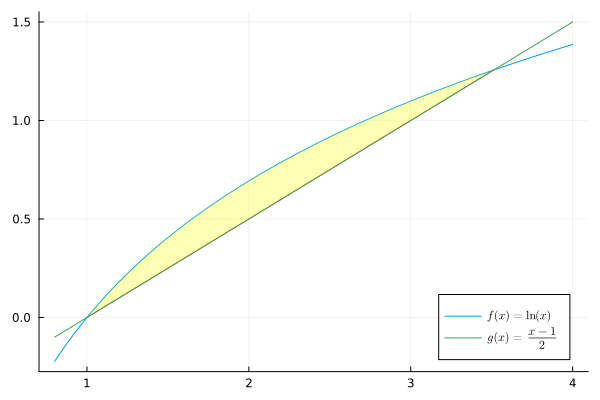

In [40]:
using SymPy, Plots, LaTeXStrings
@vars x real = true
gr()
plot(f, 0.8, 4, label = L"$f(x)=\ln(x)$", legend = :bottomright)
plot!(g, raices[1], raices[2], fillrange = f, fillalpha = 0.3, fillcolor = :yellow, label = "")
plot!(g, label = L"$g(x)=\frac{x-1}{2}$")

A continuación dibujamos el sólido de revolución generado por la rotación alrededor del eje $x$ parametrizado en 3D.

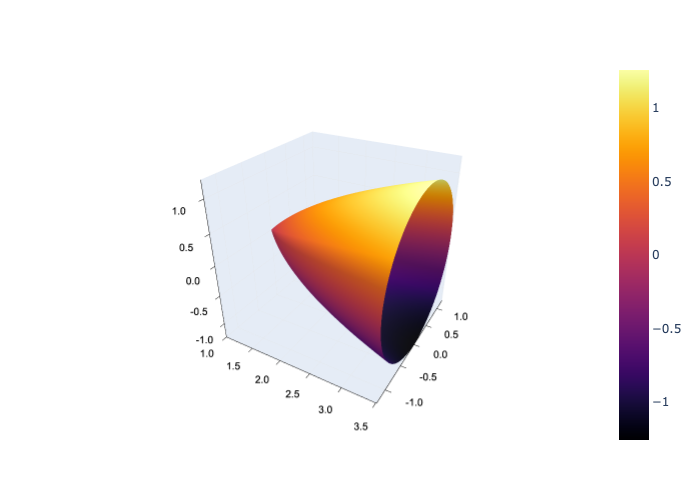

In [41]:
using Unzip
plotlyjs()
@vars x, u, v real=true
h(x) = abs(f(x) - g(x))
S(u, v) = (u, f(u)*cos(v), f(u)*sin(v))
us = range(raices[1], raices[2], length=100)
vs = range(0, 2pi, length=100)
ws = unzip(S.(us, vs'))
surface(ws...)

Calculamos el volumen del sólido de revolución mediante la integral:
$$\pi\int_{a}^{b} (|{f(x)- g(x)}|)^2\,dx$$

In [42]:
# Calculamos el volumen del sólido de revolución

using SymPy, LaTeXStrings, QuadGK
@vars x real = true
h(x) = abs(f(x) - g(x)) # da igual el valor abs?
a = raices[1]
b = raices[2]
solucion = quadgk(PI*h(x)^2, a, b, rtol = 10^-10)
N(solucion[1])

0.1561135541476354235128838333997098497979187021593979994757966198270546297845994

También podemos calcularlo mediante la integral:
$$2\pi\int_{a}^{b} x (|{f(x)- g(x)}|)\,dx$$

Dibujaremos el sólido de revolución que se forma al girar la región comprendida entre las funciones $f(x)=ln(x)$ y $g(x)=\frac{x-1}{2}$ alrededor del eje $y$.

In [43]:
# como lo dibujo?

In [44]:
using SymPy, LaTeXStrings, QuadGK
@vars x, y real = true
h(x) = abs(f(x) - g(x))
a = raices[1]
b = raices[2]
solucion2 = quadgk(2*PI*x*h(x), a, b, rtol = 10^-10)
N(solucion2[1]) # por qué no me da el mismo resultado?

4.360963102597601223554375174378211537050143267800779288386513751117852421997017

## Solución 2

Otra posible forma de afrontar el problema es calcular el centro de masas de la región y calcular el volumen del sólido de revolución mediante el teorema de Pappus.

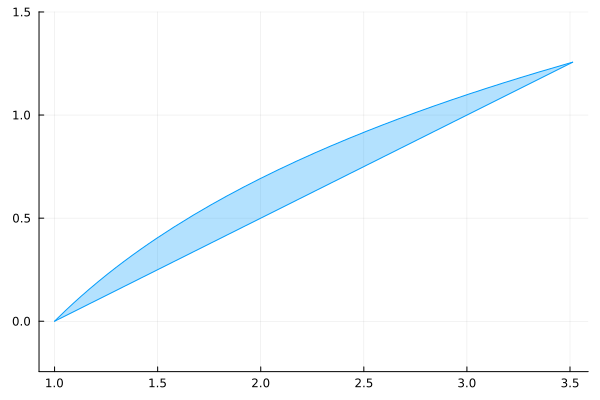

In [45]:
using SymPy, Plots
@vars x real = true
f(x) = log(x)
g(x) = (x-1)/2
gr()
# Calculo de los puntos de corte.
a, b = N(solve(f(x)-g(x)))
plot(f(x), a, b, aspect_ratio = 1, label = "")
plot!(g(x), a, b, fillrange = f, fillalpha = 0.3, aspect_ratio = 1, c = 1, label = "")

Debemos calcular el centroide $(\overline{x},\overline{y})$.
Para calcular el `centroide` $(\overline{x},\overline{y})$ `de una región plana` encerrada por dos curvas  y  en el intervalo hay que calcular por separado el centro de masas con respecto al eje , y el centro de masas con respecto al eje , mediante cociente de las siguientes integrales definidas:
$$\overline{x}=\frac{\int_a^b x\cdot (f(x)-g(x))\,dx}{\int_a^b (f(x)-g(x))\,dx}$$
$$\overline{y}=\frac{\int_a^b \frac{1}{2}\cdot (f(x)^2-g(x)^2)\,dx}{\int_a^b (f(x)-g(x))\,dx}$$

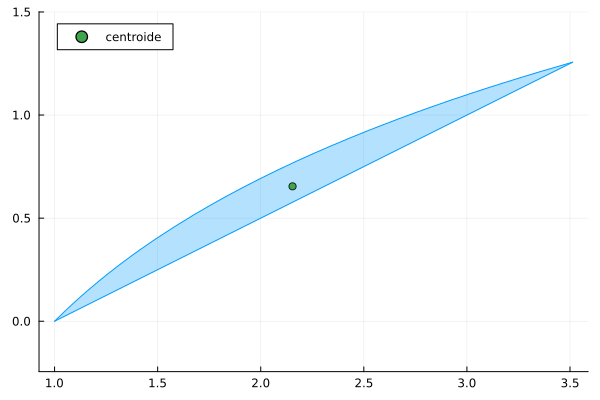

In [46]:
# Coordenada x del centroide.
cx = integrate(x*(f(x)-g(x)), a, b) / integrate(f(x)-g(x), a, b)
# Coordenada y del centroide
cy = 1/2 * integrate(f(x)^2-g(x)^2, a, b) / integrate(f(x)-g(x), a, b)
# Dibujamos el centroide
scatter!((cx,cy), label = "centroide", legend = :topleft)

Para calcular el volumen del sólido de revolución generado al rotar esta región sobre el eje  podemos usar el teorema de Pappus que establece que el volumen es el area de la región multiplicada por la longitud del camino recorrido por el centroide.
Al rotar la región sobre el eje $x$ el camino recorrido por el centroide es $2\pi\overline{y}$.

In [51]:
using QuadGK, SymPy 
solucion = 2*PI*cy*quadgk((f(x)-g(x)), a, b, rtol = 10^-10)[1]
N(solucion[1])

1.324411106870853440944400529849072894574082252578362333742984966932502631571436

Y al rotarla sobre el eje $y$ el camino recorrido por el centroide es $2\pi\overline{x}$.

In [48]:
using QuadGK
solucion = quadgk(2*PI*cx*abs(f(x)-g(x)), a, b, rtol = 10^-10)
N(solucion[1])

4.360963102597601222847664699897159907265623958804688866208969477921666090602656